In [1]:
%pip install keras
%pip install contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Tools & libraries

In [3]:
import numpy as np 
import pandas as pd 
import os
import re
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import contractions
import warnings 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Get the data

In [4]:
data = pd.read_csv("C:\\Users\\91951\\Downloads\\Misogyny-Detection-main\\Misogyny-Detection-main\\sexism_data.csv")
data.head()

,id,dataset,text,toxicity,sexist,of_id
0,0,other,MENTION3481 i didn't even know random was an o...,0.118180,False,-1
1,1,other,Bottom two should've gone! #mkr,0.251850,False,-1
2,2,callme,MENTION3111 MENTION3424 ladyboner deserves so ...,0.113331,False,-1
3,3,other,She shall now be known as Sourpuss #MKR #KatAn...,0.531153,False,-1
4,4,other,Tarah W threw a bunch of women under the bus s...,0.118718,False,-1


In [5]:
print(data['sexist'].value_counts())

sexist
False    11822
True      1809
Name: count, dtype: int64


# Clean the data

In [6]:
def clean_text(text):
    text = text.lower()#convert the text to lower
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')#remove urls
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))#remove account handles
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()

    text = re.sub(r"im", "i'm", text)
    text = re.sub(r"hes", "he's", text)
    text = re.sub(r"shes", "she's", text)
    text = re.sub(r"thats", "that's", text)        
    text = re.sub(r"whats", "what's", text)
    text = re.sub(r"wheres", "where's", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"wont", "won't", text)
    text = re.sub(r"dont", "don't", text)
    text = re.sub(r"didnt", "didn't", text)
    text = re.sub(r"cant", "can't", text)
    text = re.sub(r"its", "it's", text)
    text = re.sub(r"couldnt", "couldn't", text)
    text = re.sub(r"havent", "haven't", text)
    text = re.sub(r"shouldnt", "shouldn't", text)
    text = contractions.fix(text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

# Tokenization

In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(data):
    head_lines = list()
    lines = data["text"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(data)
head_lines[0:10]

[['even', 'know', 'random', 'option'],
 ['bottom', 'two', 'gone', 'mkr'],
 ['ladyboner',
  'deserves',
  'much',
  'credit',
  'dudeboner',
  'bonerdebate',
  'reddetails'],
 ['shall', 'known', 'sourpuss', 'mkr', 'katandre', 'failedfoodies'],
 ['tarah',
  'w',
  'threw',
  'bunch',
  'women',
  'bus',
  'could',
  'get',
  'wadhwas',
  'support',
  'women',
  'tech',
  'book'],
 ['trust', 'adult', 'uses', 'coupons'],
 ['mkr'],
 ['returns',
  'couples',
  'intruders',
  'gate',
  'crashers',
  'secondchancers',
  'eliminated',
  'mkr'],
 ['abuse', 'comes', 'gamergate', 'accounts', 'days', 'old'],
 ['great',
  'see',
  'local',
  'national',
  'park',
  'workers',
  'tucking',
  'free',
  'feed',
  'empty',
  'loos',
  'instead',
  'mkr']]

# Adding POS tags to the generated tokens 

In [8]:
import nltk

# download the necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# perform POS tagging on each sentence in head_lines
pos_tagged_head_lines = []
for text in head_lines:
    pos_tagged_sentence = nltk.pos_tag(text)#function uses the Penn Treebank tagset by default
    pos_tagged_head_lines.append(pos_tagged_sentence)

print(pos_tagged_head_lines[0:10])
#"NN" for singular nouns, "VB" for verbs, "JJ" for adjectives

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[[('even', 'RB'), ('know', 'VBP'), ('random', 'NN'), ('option', 'NN')], [('bottom', 'NN'), ('two', 'CD'), ('gone', 'VBN'), ('mkr', 'NN')], [('ladyboner', 'NN'), ('deserves', 'NNS'), ('much', 'JJ'), ('credit', 'NN'), ('dudeboner', 'NN'), ('bonerdebate', 'NN'), ('reddetails', 'NNS')], [('shall', 'MD'), ('known', 'VBN'), ('sourpuss', 'VB'), ('mkr', 'JJ'), ('katandre', 'NN'), ('failedfoodies', 'NNS')], [('tarah', 'NN'), ('w', 'NN'), ('threw', 'VBD'), ('bunch', 'JJ'), ('women', 'NNS'), ('bus', 'NN'), ('could', 'MD'), ('get', 'VB'), ('wadhwas', 'JJ'), ('support', 'NN'), ('women', 'NNS'), ('tech', 'VBP'), ('book', 'NN')], [('trust', 'NN'), ('adult', 'NN'), ('uses', 'VBZ'), ('coupons', 'NNS')], [('mkr', 'NN')], [('returns', 'NNS'), ('couples', 'VBZ'), ('intruders', 'NNS'), ('gate', 'JJ'), ('crashers', 'NNS'), ('secondchancers', 'NNS'), ('eliminated', 'VBD'), ('mkr', 'NN')], [('abuse', 'NN'), ('comes', 'VBZ'), ('gamergate', 'JJ'), ('accounts', 'NNS'), ('days', 'NNS'), ('old', 'JJ')], [('great',

# Visualize the most occuring words

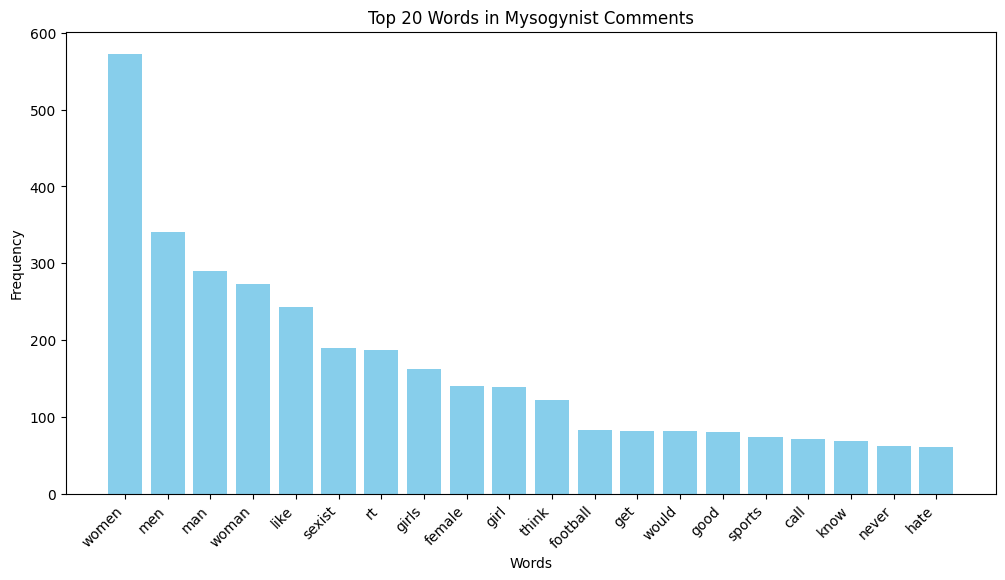

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

pos_data = data.loc[data['sexist'] == True]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)



top_words = word_could_dict.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Mysogynist Comments')
plt.show()


# Train-test split

In [10]:
validation_split = 0.2
max_length = 100


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  data['sexist'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

unique tokens -  13687
vocab size - 13688


In [11]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (10905, 100)
Shape of y_train: (10905,)
Shape of X_test_pad: (2726, 100)
Shape of y_test: (2726,)


# BERT model

In [12]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split


texts = data["text"]
labels = data["sexist"]  

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.20, random_state=42
)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


def get_bert_embeddings(text_list):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # CLS token
        embeddings.append(cls_embedding)
    return np.array(embeddings)

X_train_bert = get_bert_embeddings(train_texts)
X_test_bert = get_bert_embeddings(test_texts)

lr_model = LogisticRegression()
lr_model.fit(X_train_bert, train_labels) 

y_pred = lr_model.predict(X_test_bert)
accuracy = accuracy_score(test_labels, y_pred) 
print('BERT Model Accuracy: {:.2f}%'.format(accuracy * 100))


c:\Users\91951\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BERT Model Accuracy: 91.05%


c:\Users\91951\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# GloVe model

In [ ]:
embeddings_index = {}
embedding_dim = 100
with open(os.path.join("C:\\Users\\91951\\Downloads\\glove.twitter.27B.100d.txt\\glove.twitter.27B.100d.txt"), encoding = "utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# Extract features

In [ ]:
import numpy as np

# Define a function to extract features from a list of preprocessed text using the GloVe embeddings
def extract_features(text, embeddings_index, embedding_dim):
    # Initialize the feature vector with zeros
    feature_vec = np.zeros((embedding_dim,))
    # Initialize a counter for the number of words
    n_words = 0
    # Loop over each word in the text
    for word in text:
        # Check if the word is in the embeddings index
        if word in embeddings_index:
            # Add the word vector to the feature vector
            feature_vec += embeddings_index[word]
            # Increment the word counter
            n_words += 1
    # Divide the feature vector by the number of words to get the average
    if n_words > 0:
        feature_vec /= n_words
    return feature_vec

# Set the embedding dimension
embedding_dim = 100

# Apply the extract_features function to the 'text' column
data['features'] = data['text'].apply(lambda text: extract_features(text.split(), embeddings_index, embedding_dim))
print(data["features"])

# Build the embedding layer

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

# Logistic Regression Model


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train_pad, y_train)

# Predict the labels for the test set
y_pred = lr_model.predict(X_test_pad)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


Accuracy: 86.21%


c:\Users\91951\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes Model

In [14]:
df = pd.read_csv("C:\\Users\\91951\\Downloads\\Misogyny-Detection-main\\Misogyny-Detection-main\\sexism_data.csv")

In [15]:
df["sexist"] = df["sexist"].map({False: "Not misogynist", True: "is misogynist"})

print(df.head())

   id dataset                                               text  toxicity  \
0   0   other  MENTION3481 i didn't even know random was an o...  0.118180   
1   1   other                   Bottom two should've gone!  #mkr  0.251850   
2   2  callme  MENTION3111 MENTION3424 ladyboner deserves so ...  0.113331   
3   3   other  She shall now be known as Sourpuss #MKR #KatAn...  0.531153   
4   4   other  Tarah W threw a bunch of women under the bus s...  0.118718   

           sexist  of_id  
0  Not misogynist     -1  
1  Not misogynist     -1  
2  Not misogynist     -1  
3  Not misogynist     -1  
4  Not misogynist     -1  


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
df = df[["text", "sexist"]]
x = np.array(df["text"])
y = np.array(df["sexist"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(X, y, test_size=0.60, random_state=30)

In [17]:
modelNB = BernoulliNB()
modelNB.fit(X_trainNB, y_trainNB)
print(modelNB.score(X_testNB, y_testNB))

0.8696662183641032


# Build the RNN (Bidirectional LSTM)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Dropout

model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print('Summary of the built model...')
print(model.summary())


Summary of the built model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,368,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,368,800 (5.22 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,368,800 (5.22 MB)

None


## *Training*

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=128, epochs=15, validation_data=(X_test_pad, y_test), verbose=2)


Epoch 1/15
86/86 - 11s - 124ms/step - acc: 0.8584 - loss: 0.3717 - val_acc: 0.8672 - val_loss: 0.2674
Epoch 2/15
86/86 - 3s - 39ms/step - acc: 0.8838 - loss: 0.2485 - val_acc: 0.8958 - val_loss: 0.2427
Epoch 3/15
86/86 - 3s - 39ms/step - acc: 0.9080 - loss: 0.1977 - val_acc: 0.9068 - val_loss: 0.2151
Epoch 4/15
86/86 - 4s - 45ms/step - acc: 0.9344 - loss: 0.1485 - val_acc: 0.9028 - val_loss: 0.2247
Epoch 5/15
86/86 - 3s - 39ms/step - acc: 0.9585 - loss: 0.1050 - val_acc: 0.8999 - val_loss: 0.2539
Epoch 6/15
86/86 - 3s - 39ms/step - acc: 0.9696 - loss: 0.0815 - val_acc: 0.8962 - val_loss: 0.2842
Epoch 7/15
86/86 - 3s - 39ms/step - acc: 0.9821 - loss: 0.0558 - val_acc: 0.9002 - val_loss: 0.3610
Epoch 8/15
86/86 - 3s - 39ms/step - acc: 0.9833 - loss: 0.0503 - val_acc: 0.9072 - val_loss: 0.3836
Epoch 9/15
86/86 - 3s - 39ms/step - acc: 0.9896 - loss: 0.0366 - val_acc: 0.9032 - val_loss: 0.3395
Epoch 10/15
86/86 - 3s - 39ms/step - acc: 0.9895 - loss: 0.0354 - val_acc: 0.9098 - val_loss: 0.35

In [ ]:
for epoch, acc in enumerate(history.history['acc']):
    print("Epoch {}: training accuracy = {:.4f}".format(epoch+1, acc))

Epoch 1: training accuracy = 0.8584
Epoch 2: training accuracy = 0.8838
Epoch 3: training accuracy = 0.9080
Epoch 4: training accuracy = 0.9344
Epoch 5: training accuracy = 0.9585
Epoch 6: training accuracy = 0.9696
Epoch 7: training accuracy = 0.9821
Epoch 8: training accuracy = 0.9833
Epoch 9: training accuracy = 0.9896
Epoch 10: training accuracy = 0.9895
Epoch 11: training accuracy = 0.9903
Epoch 12: training accuracy = 0.9922
Epoch 13: training accuracy = 0.9933
Epoch 14: training accuracy = 0.9918
Epoch 15: training accuracy = 0.9932


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)

# Print the test accuracy
print('Test accuracy:', test_accuracy)


Test accuracy: 0.9009537696838379


## *Visualize the learning*

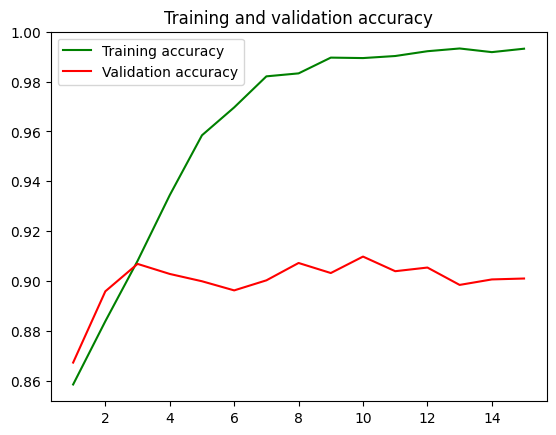

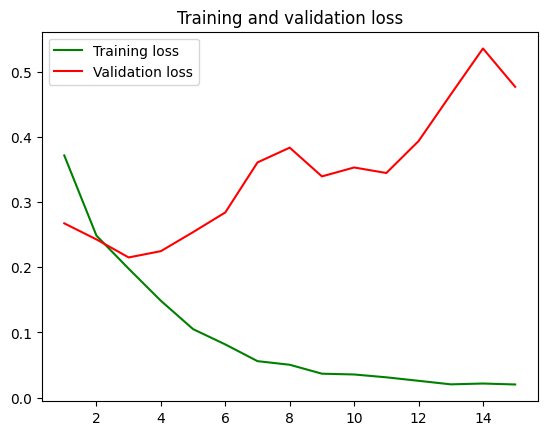

In [ ]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<hr>
<h2><i>Can this model detect Misogyny?</i></h2>

In [ ]:
def detect_misogyny(s):
    x_final = pd.DataFrame({"text":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    y_pred =model.predict(test_review_pad)
    y_pred*=100
    if y_pred[0][0]>=87:
        print(y_pred[0][0]) 
        return "Misogynist" 
    else: return "Not misogynist"

### *Correct guesses*

In [ ]:
detect_misogyny("Women belong in the kitchen.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
97.88087


"You're a misogynist"

In [ ]:
detect_misogyny("If you still cook, do the dishes, or clean the house when your woman is around, you're the woman of the house. You should be answering miss.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
94.94209


"You're a misogynist"

In [ ]:
detect_misogyny("Women are too emotional to handle leadership roles.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
99.748146


"You're a misogynist"

In [ ]:
detect_misogyny("Girls shouldn’t be allowed to drive; they’re too distracted.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
99.55438


"You're a misogynist"

In [ ]:
detect_misogyny("boys will be boys")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
98.98208


"You're a misogynist"

In [ ]:
detect_misogyny("you look extremely pretty tonight")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


"You're good to go."

In [ ]:
detect_misogyny("She’s a talented engineer who’s great at problem-solving")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


"You're good to go."